# MY FIRST PROJECT

# Flight Fare Prediction

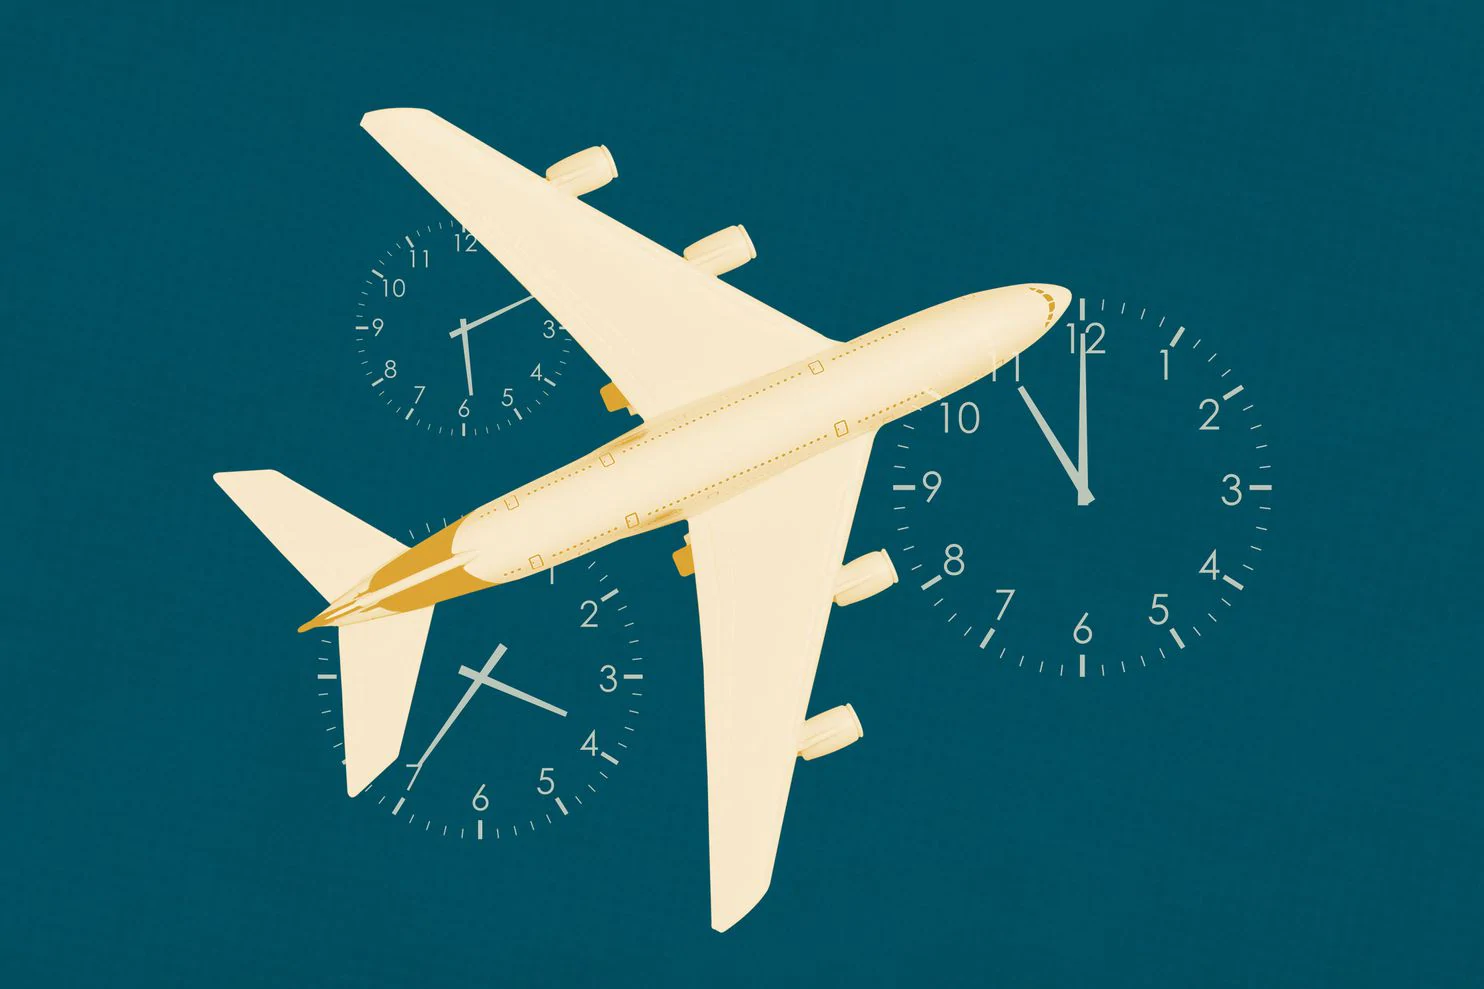

# STATEMENT

Flight Ticket Prize is Highly Unpredictive, We observe many times the Surge of Flight Ticket prize , But As A DATA SCIENCE ASPIRANT I SURELY SAY THAT Nothing is Unpredictive if we have right Collection of data

"According to me DATA is like astrological Parrot who Can Speak Future"

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
###  IMPORTING REQUIRED LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### Importing dataset

###Reading Test and Train data sets

dt=pd.read_csv("F:\DATA_SCIENCE\DATASET\Flight Prediction\Data_Train.csv")
td=pd.read_csv("F:\DATA_SCIENCE\DATASET\Flight Prediction\Test_set.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
dt

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [6]:
dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
### Here we observed that in "Route" & "Total_Stops" Have 1 NULL DATA each , So we will remove it

dt.dropna(inplace=True)

In [9]:
###Now, We can observed there is no NULL DATA

dt.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
dt["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

WE have to Remove 'Trujet' , 'Jet Airways' & 'Jet Airways Business' Airlines from data as these Airlines Discountinued Their Services so its reductant to us.

In [11]:
indexNames = dt[ dt['Airline'] == "Trujet" ].index

dt.drop(indexNames , inplace=True)

indexNames = dt[ dt['Airline'] == "Jet Airways" ].index

dt.drop(indexNames , inplace=True)

indexNames = dt[ dt['Airline'] == "Jet Airways Business" ].index

dt.drop(indexNames , inplace=True)

In [12]:
print(dt.shape)
dt["Airline"].unique()  ### NOTICE DATASET REDUCED TO 6826 FROM 10683.

(6826, 11)


array(['IndiGo', 'Air India', 'SpiceJet', 'Multiple carriers', 'GoAir',
       'Vistara', 'Air Asia', 'Vistara Premium economy',
       'Multiple carriers Premium economy'], dtype=object)

# Exploratory Data Analysis (EDA)

We require pandas to_datetime to convert object data type to datetime dtype.

dt.day method will extract only day of that date

dt.month method will extract only month of that date

In [13]:
dt["journey_day"]=pd.to_datetime(dt.Date_of_Journey,format="%d/%m/%Y").dt.day
dt["journey_month"]=pd.to_datetime(dt.Date_of_Journey,format="%d/%m/%Y").dt.month
dt.drop(["Date_of_Journey"],axis=1,inplace=True)  ### AS WE NO LONGER REQUIRED DATE OF JOURNING SO WE CAN DROP IT

In [14]:
### Similarly we can Extract Hours & minutes from Dep_Time

dt["dep_hour"]=pd.to_datetime(dt.Dep_Time).dt.hour
dt["dep_min"]=pd.to_datetime(dt.Dep_Time).dt.minute
dt.drop(["Dep_Time"],axis=1,inplace=True)  ### AS WE NO LONGER REQUIRED Dep_Time SO WE CAN DROP IT

In [15]:
### Similarly we can Extract Hours & minutes from Arrival_Time

dt["arrival_hour"]=pd.to_datetime(dt.Arrival_Time).dt.hour
dt["arrival_min"]=pd.to_datetime(dt.Arrival_Time).dt.minute
dt.drop(["Arrival_Time"],axis=1,inplace=True)    ### AS WE NO LONGER REQUIRED Arrival_Time SO WE CAN DROP IT

In [16]:
dt.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25


Time taken by plane to reach destination is called Duration.

It is the differnce between Departure Time and Arrival time.

Assigning and converting Duration column into list

In [17]:

duration = list(dt["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [18]:
dt['Duration_hours'] = duration_hours
dt['Duration_minutes'] = duration_mins   #### Adding duration_hours and duration_mins list to dt dataframe

In [19]:
dt.drop(["Duration"],axis=1,inplace=True)    ### AS WE NO LONGER REQUIRED Duration SO WE CAN DROP IT

# Handling Categorical Data

For Nominal data >>>> data are not in  order  >>>>> OneHotEncoder is used.


For Ordinal data  >>>>>   data are in order  >>>>> LabelEncoder is used.

In [20]:
dt["Airline"].value_counts()

IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Name: Airline, dtype: int64

# Graph

# Source VS Price

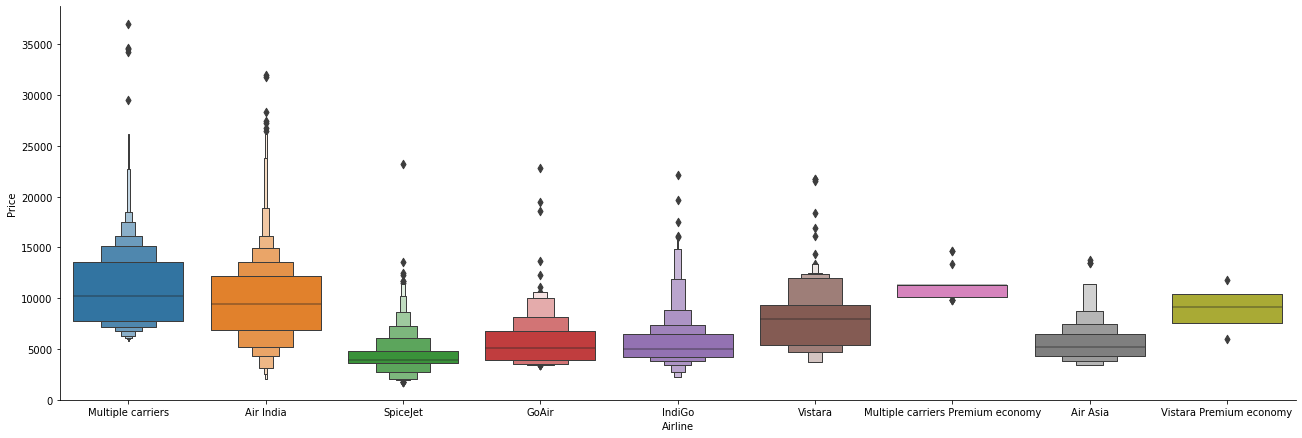

In [21]:
sns.catplot(y="Price",x="Airline",data=dt.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

Airline is Type of Nominal Categorical data , So we will use OneHotEncoding

In [22]:
Airline=dt[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0


In [23]:
dt["Source"].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       477
Chennai      381
Name: Source, dtype: int64

# Source VS Price

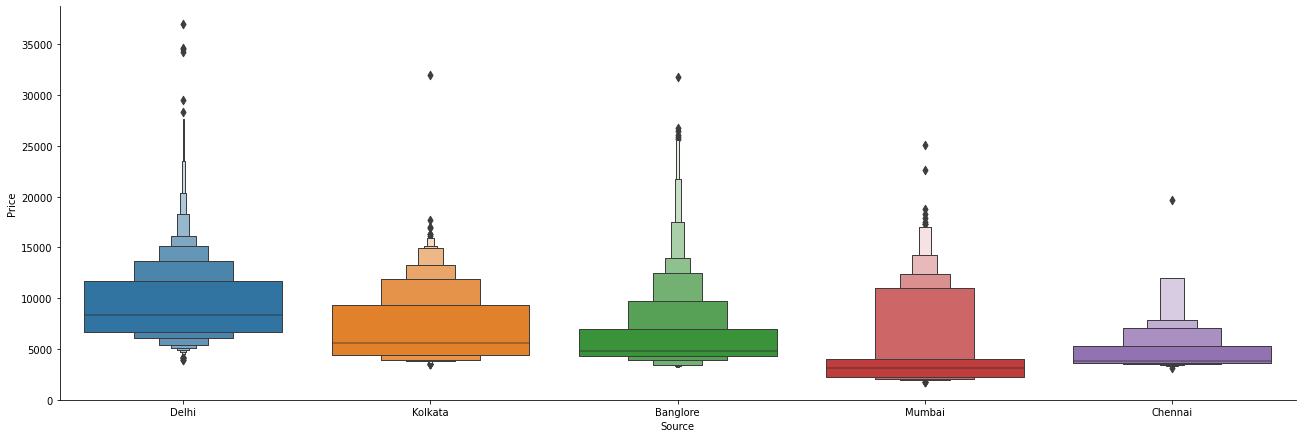

In [24]:
sns.catplot(y="Price",x="Source",data=dt.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)

Source is Type of Nominal Categorical data , So we will use OneHotEncoding

In [25]:
Source=dt[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


In [26]:
dt["Destination"].value_counts()

Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     477
Kolkata       381
Name: Destination, dtype: int64

Destination is Type of Nominal Categorical data , So we will use OneHotEncoding

In [27]:
Destination=dt[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


In [28]:
dt["Route"]

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
5                    CCU ? BLR
                 ...          
10677                BLR ? DEL
10678                CCU ? BLR
10679                CCU ? BLR
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 6826, dtype: object

In [30]:
### AS WE NO LONGER REQUIRED Route & Additional_Info SO WE CAN DROP IT


dt.drop(["Route","Additional_Info"],axis=1,inplace=True)  

In [31]:
dt["Total_Stops"].value_counts()

1 stop      3085
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Total_Stops is Type of Ordinal Categorical data , So we will use LabelEncoder

In [32]:
dt.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [33]:
dt.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25


Concatenate dataframe ==== dt + Airline + Source + Destination

In [34]:
data_train=pd.concat([dt,Airline,Source,Destination],axis=1)

In [35]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [36]:
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)  ### AS WE NO LONGER REQUIRED Airline,Source,DestinationSO WE CAN DROP IT

In [37]:
data_train.shape

(6826, 27)

# NOW WE WILL TEST ### TEST SET

In [38]:
td.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [39]:
td['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

WE have to Remove 'Trujet' , 'Jet Airways' & 'Jet Airways Business' Airlines from data as these Airlines Discountinued Their Services so its reductant to us.

In [41]:
indexNames = td[ td['Airline'] == "Trujet" ].index

td.drop(indexNames , inplace=True)

indexNames = td[ td['Airline'] == "Jet Airways" ].index

td.drop(indexNames , inplace=True)

indexNames = td[ td['Airline'] == "Jet Airways Business" ].index

td.drop(indexNames , inplace=True)

# EDA on Test data

Extracting day from Date of Journey

In [42]:
td["Journey_day"] = pd.to_datetime(td["Date_of_Journey"], format = "%d/%m/%Y").dt.day
td["Journey_month"] = pd.to_datetime(td["Date_of_Journey"], format = "%d/%m/%Y").dt.month
td.drop(["Date_of_Journey"], axis = 1, inplace = True) 

Extracting Hour & Minutes from Dep_Time and Arrival_Time

In [43]:
td["Dep_hour"] = pd.to_datetime(td["Dep_Time"]).dt.hour
td["Dep_min"] = pd.to_datetime(td["Dep_Time"]).dt.minute
td.drop(["Dep_Time"], axis=1, inplace = True)

In [44]:
td["Arrival_hour"] = pd.to_datetime(td["Arrival_Time"]).dt.hour
td["Arrival_min"] = pd.to_datetime(td["Arrival_Time"]).dt.minute
td.drop(["Arrival_Time"], axis = 1, inplace = True)

In [45]:

duration = list(td["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(duration[i].split(sep = "h")[0])
    duration_mins.append(duration[i].split(sep = "m")[0].split()[-1])
    


td["Duration_hours"] = duration_hours
td["Duration_mins"] = duration_mins

In [46]:
td.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,5,6,20,10,20,4,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50
6,Air India,Banglore,New Delhi,BLR ? TRV ? DEL,15h 5m,1 stop,No info,12,3,7,30,22,35,15,5
7,IndiGo,Kolkata,Banglore,CCU ? HYD ? BLR,5h 15m,1 stop,No info,1,5,15,15,20,30,5,15


# Categorical data

In [47]:
Airline=[["Airline"]]
Airline=pd.get_dummies(td["Airline"],drop_first=True)
Airline

,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2665,0,0,0,0,0,1,0,0
2666,1,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0
2669,1,0,0,0,0,0,0,0


In [48]:
Source=[["Source"]]
Source=pd.get_dummies(td["Source"],drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
1,0,0,1,0
3,0,1,0,0
4,0,0,0,0
6,0,0,0,0
7,0,0,1,0
...,...,...,...,...
2665,0,0,0,1
2666,0,0,1,0
2667,0,0,1,0
2669,0,1,0,0


In [49]:
Destination=[["Destination"]]
Destination=pd.get_dummies(td["Destination"],drop_first=True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,0,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
6,0,0,0,0,1
7,0,0,0,0,0
...,...,...,...,...,...
2665,0,0,1,0,0
2666,0,0,0,0,0
2667,0,0,0,0,0
2669,1,0,0,0,0


In [50]:
td.drop(["Route", "Additional_Info"], axis=1, inplace = True)

In [51]:
td["Total_Stops"].value_counts()

1 stop      828
non-stop    705
2 stops     227
3 stops      11
4 stops       1
Name: Total_Stops, dtype: int64

In [52]:
td.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [53]:
data_test=pd.concat([td,Airline,Source,Destination],axis=1)

In [54]:
data_test

,Airline,Source,Destination,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1,IndiGo,Kolkata,Banglore,4h,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,Delhi,Cochin,13h,1,21,5,8,0,21,0,13,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,2h 50m,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,Air India,Banglore,New Delhi,15h 5m,1,12,3,7,30,22,35,15,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,IndiGo,Kolkata,Banglore,5h 15m,1,1,5,15,15,20,30,5,15,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,SpiceJet,Mumbai,Hyderabad,1h 30m,0,21,6,22,45,0,15,1,30,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2666,Air India,Kolkata,Banglore,23h 55m,1,6,6,20,30,20,25,23,55,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,IndiGo,Kolkata,Banglore,2h 35m,0,27,3,14,20,16,55,2,35,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2669,Air India,Delhi,Cochin,15h 15m,1,6,3,4,0,19,15,15,15,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Feature Selection

heatmap

featureimportance

SelectKBest

In [55]:
data_train.shape

(6826, 27)

In [56]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [63]:
X=data_train.loc[:,['Total_Stops', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,24,6,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [64]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
3     6218
4    13302
5     3873
Name: Price, dtype: int64

# Correlation between Dependent and Independent attributes.

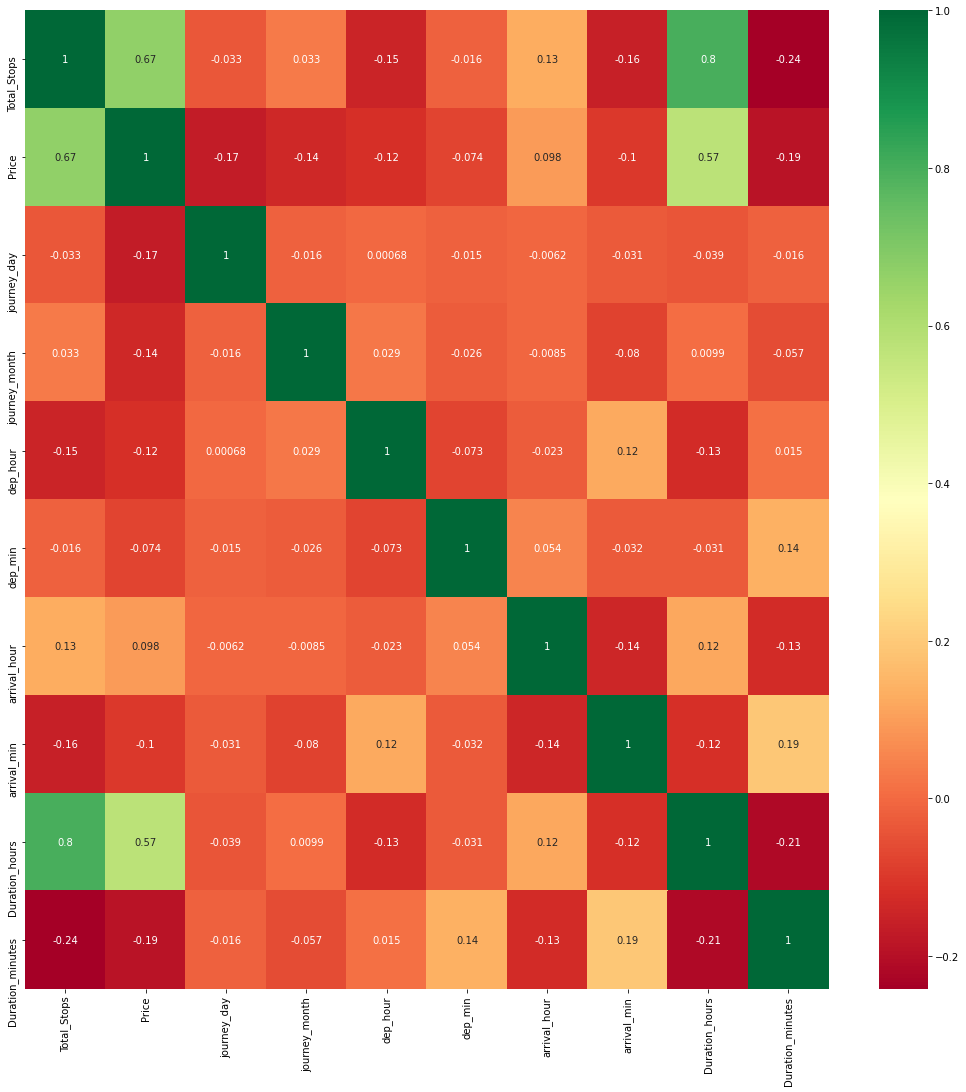

In [65]:
plt.figure(figsize=(18,18))
sns.heatmap(dt.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [66]:
# Using Extra Trees Regressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [67]:
print(selection.feature_importances_)

[2.90910469e-01 1.21716789e-01 7.38432957e-02 3.40422375e-02
 3.35956882e-02 3.10180454e-02 2.76809452e-02 1.08201327e-01
 2.45549950e-02 4.08748973e-02 3.83826598e-03 2.20682981e-02
 4.74772899e-02 2.08165772e-03 5.36154283e-03 1.27568114e-02
 2.02659152e-04 1.19662416e-03 3.87405001e-02 5.33460419e-03
 4.24012202e-03 3.89910097e-02 1.80664831e-03 4.31168906e-03
 1.10048668e-03 2.40531017e-02]


Graph of feature for visualization

<function matplotlib.pyplot.show(close=None, block=None)>

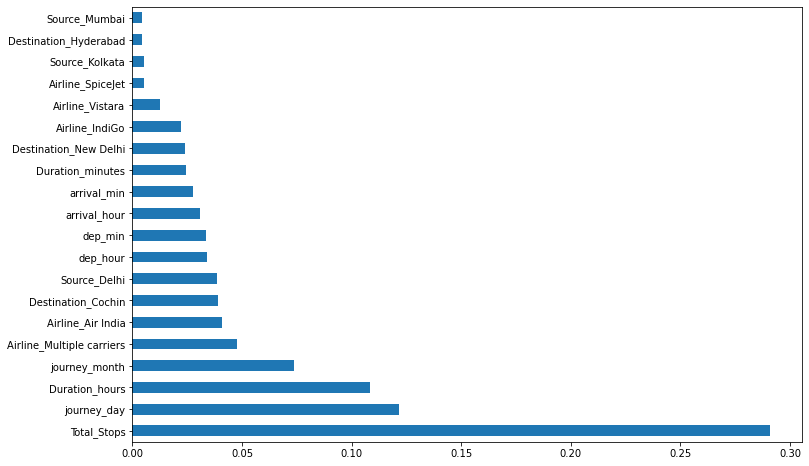

In [68]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show

Fitting model using Random Forest

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
# Predicting Y values on X_test

y_pred=reg_rf.predict(X_test)

In [72]:
reg_rf.score(X_train,y_train)

0.9738314702708529

In [73]:
reg_rf.score(X_test,y_test)


0.8116391043182704

c:\users\vinay-pc\appdata\local\programs\python\python39-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


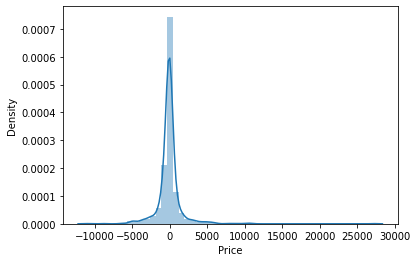

In [74]:
sns.distplot(y_test-y_pred)
plt.show()

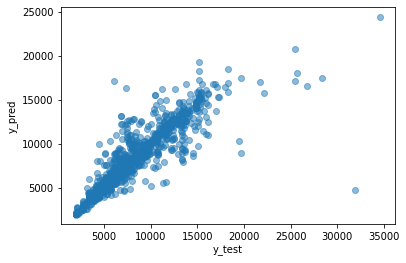

In [75]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [76]:
from sklearn import metrics

In [77]:
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 788.8489422017709
MSE: 2830985.5081478534
RMSE: 1682.5532705230623


In [78]:
metrics.r2_score(y_test,y_pred)

0.8116391043182704

# Hyperparameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Number of tress in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split.
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# minimum number of samples required to split a node.
min_samples_split = [2, 5, 10, 15, 100]

# minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 5, 10]

In [81]:
### Random Grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter =10, verbose = 2, random_state = 42, n_jobs = 1)

In [83]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [85]:
prediction = rf_random.predict(X_test)

c:\users\vinay-pc\appdata\local\programs\python\python39-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


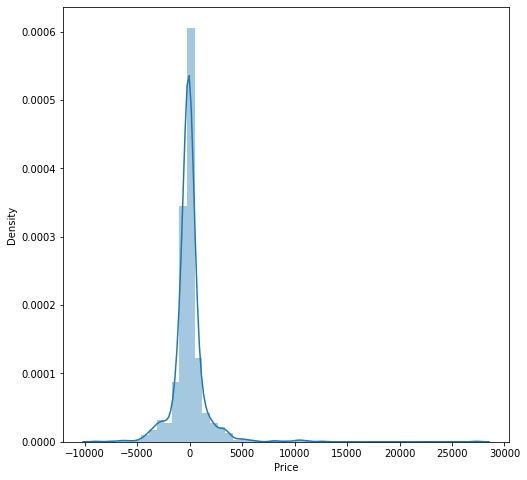

In [86]:
plt.figure(figsize = (8,8))
sns.distplot(y_test - prediction)
plt.show()

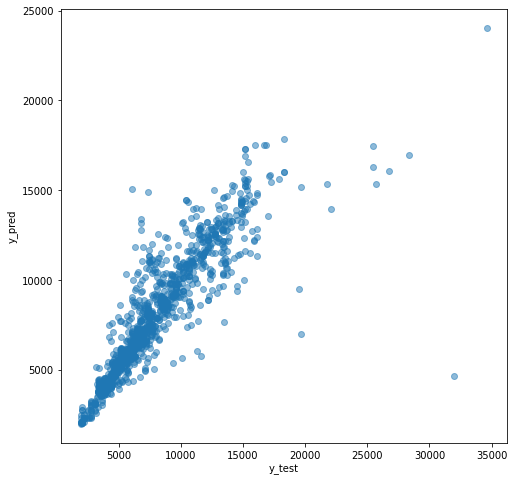

In [87]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [88]:
print('MAE :', metrics.mean_absolute_error(y_test, prediction))
print('MSE :', metrics.mean_squared_error(y_test, prediction))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE : 851.3148408443333
MSE : 2911296.914427646
RMSE : 1706.252300929627


# SAVE TO REUSE 

In [90]:
import pickle

file=open('flight_rf1.pk1','wb')

pickle.dump(rf_random,file)

In [91]:
model=open("flight_rf1.pk1","rb")
forest=pickle.load(model)

In [92]:
y_prediction=forest.predict(X_test)

In [93]:
metrics.r2_score(y_test,y_prediction)

0.8062955487342582

# Thank You